### imports

In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Deep learning (torch - not used but can be used later)
import torch
import torch.nn as nn

# Visualization
import gradio as gr
from PIL import Image, ImageOps


c:\Users\laphouse\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


`load data`

In [2]:
from sklearn.datasets import load_digits

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

print(X.shape)  # (1797, 64)
print(y.shape)  # (1797,)

(1797, 64)
(1797,)


### `EDA`

In [3]:
images = digits.images  # each is 8 x 8 pixel and flattened into 64 feature

In [4]:
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)
print("Unique labels:", np.unique(y))

Feature matrix shape: (1797, 64)
Target vector shape: (1797,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


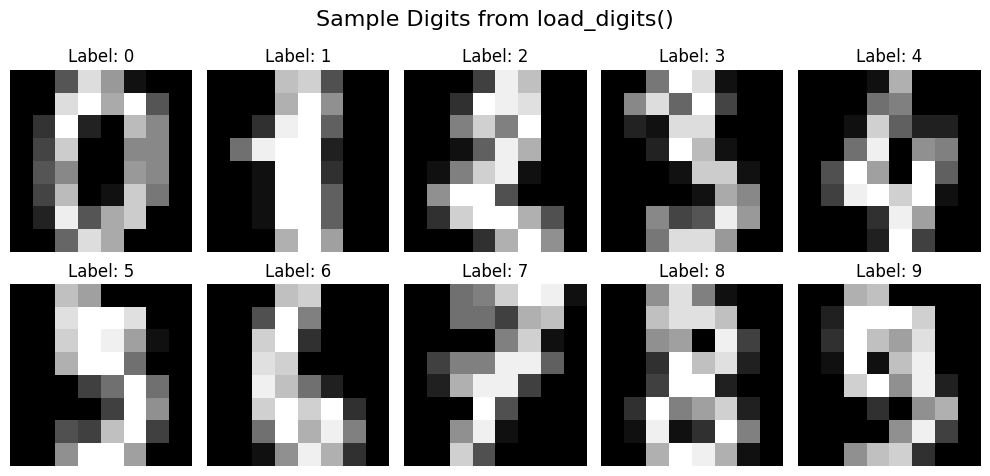

In [5]:
# Plot 10 example images with their labels
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.suptitle("Sample Digits from load_digits()", fontsize=16)
plt.tight_layout()
plt.show()


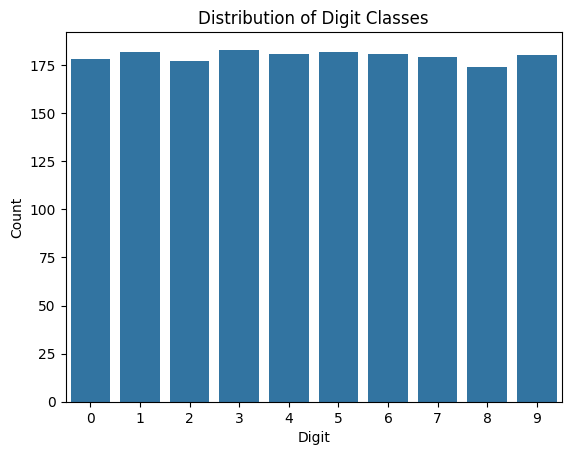

In [6]:
# check balance 

sns.countplot(x=y)
plt.title("Distribution of Digit Classes")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

In [7]:
print("Minimum pixel value:", np.min(X))
print("Maximum pixel value:", np.max(X))
print("Mean pixel value:", np.mean(X))

Minimum pixel value: 0.0
Maximum pixel value: 16.0
Mean pixel value: 4.884164579855314


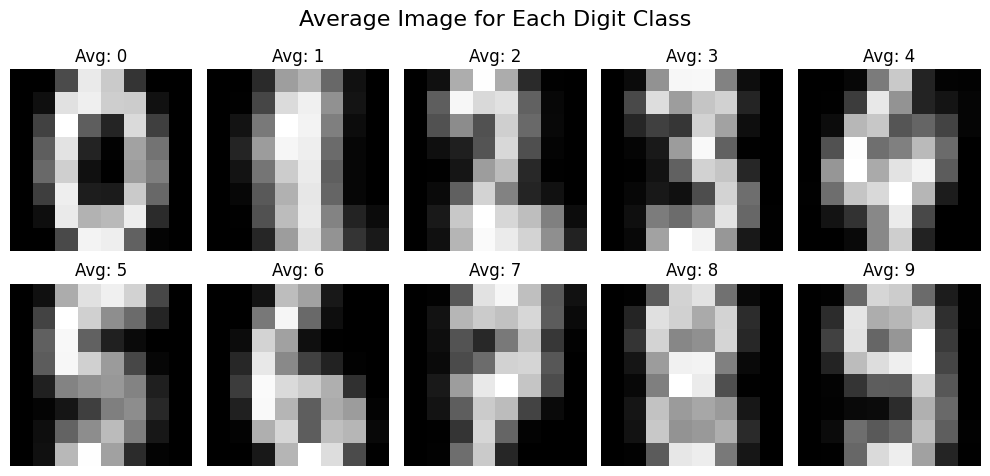

In [8]:
avg_images = np.zeros((10, 8, 8))

for digit in range(10):
    avg_images[digit] = np.mean(images[y == digit], axis=0)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for digit, ax in enumerate(axes.flat):
    ax.imshow(avg_images[digit], cmap='gray')
    ax.set_title(f"Avg: {digit}")
    ax.axis('off')
plt.suptitle("Average Image for Each Digit Class", fontsize=16)
plt.tight_layout()
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64, 32),  # 3 hidden layers
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), max_iter=1000,
              random_state=42)

In [12]:
'''
y_pred = mlp.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))'''

'\ny_pred = mlp.predict(X_test_scaled)\n\nprint("Accuracy:", accuracy_score(y_test, y_pred))\nprint("\nClassification Report:\n", classification_report(y_test, y_pred))'

In [13]:
'''acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2}")  

cm = confusion_matrix(y_test, y_pred)
# vizualize

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=digits.target_names, 
            yticklabels=digits.target_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of MLP Classifier')
plt.show()'''

'acc = accuracy_score(y_test, y_pred)\nprint(f"Accuracy: {acc:.2}")  \n\ncm = confusion_matrix(y_test, y_pred)\n# vizualize\n\nplt.figure(figsize=(10, 7))\nsns.heatmap(cm, annot=True, fmt=\'d\', cmap=\'Blues\', \n            xticklabels=digits.target_names, \n            yticklabels=digits.target_names)\n\nplt.xlabel(\'Predicted Label\')\nplt.ylabel(\'True Label\')\nplt.title(\'Confusion Matrix of MLP Classifier\')\nplt.show()'

Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.95      0.97      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



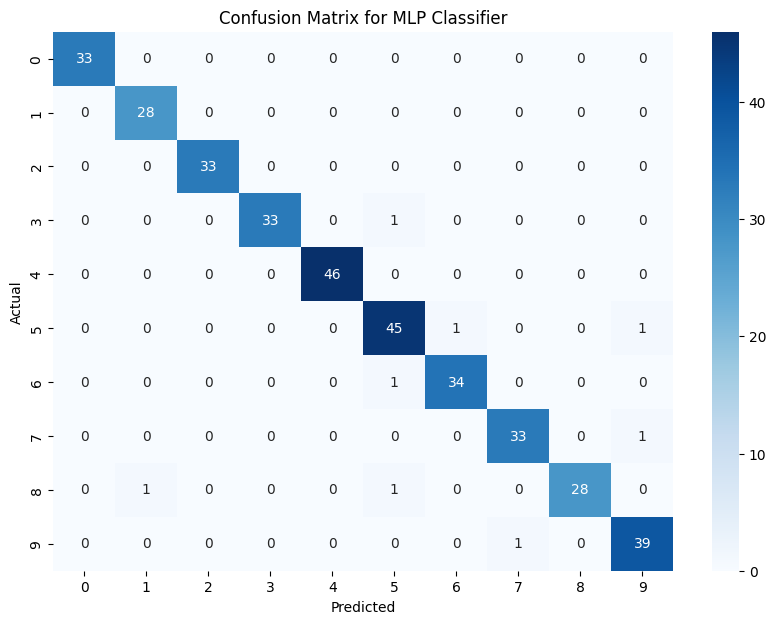

In [14]:
y_pred = mlp.predict(X_test_scaled)

# Accuracy and Classification Report
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for MLP Classifier')
plt.show()


##  GRADIO PREDICTION

In [15]:
import gradio
print(gradio.__version__)

5.36.2


In [30]:
import gradio as gr
import numpy as np
from PIL import Image, ImageOps

def predict_digit(img):
    if img is None:
        return "Please draw a digit on the sketchpad", None
    
    try:
        # Extract the drawing layer (first layer) from the dictionary
        if isinstance(img, dict) and 'layers' in img and len(img['layers']) > 0:
            drawing = img['layers'][0]  # Get the first layer where the drawing is
        else:
            raise ValueError("No valid layers found in input")

        # Convert RGBA to grayscale (using the RGB channels and ignoring alpha for simplicity)
        rgb_drawing = drawing[:, :, :3]  # Extract RGB channels (ignore alpha)
        gray_drawing = np.mean(rgb_drawing, axis=2).astype('uint8')  # Convert to grayscale

        # Resize to 8x8 pixels
        img_pil = Image.fromarray(gray_drawing)
        img_pil = img_pil.resize((8, 8), Image.Resampling.LANCZOS)
        
        # Convert to array and preprocess
        img_array = np.array(img_pil)
        print("Preprocessed array shape:", img_array.shape)
        print("Preprocessed array:\n", img_array)
        img_array = img_array.reshape(1, -1)
        img_array = scaler.transform(img_array)
        
        # Get prediction and probabilities
        prediction = mlp.predict(img_array)[0]
        probabilities = mlp.predict_proba(img_array)[0]
        
        # Create probability dictionary for Gradio Label component
        prob_dict = {f"Digit {i}": float(prob) for i, prob in enumerate(probabilities)}
        
        return f"Predicted Digit: {prediction}", prob_dict
    except Exception as e:
        return f"Error processing image: {str(e)}", "An error occurred during prediction. Please try again."

# Create Gradio interface
iface = gr.Interface(
    fn=predict_digit,
    inputs=gr.Sketchpad(
        type="numpy",
        crop_size="1:1",
        brush=gr.Brush(colors=["#000000"], default_size=10)
    ),
    outputs=[
        gr.Textbox(label="Prediction"),
        gr.Label(label="Probabilities for all digits")
    ],
    title="Handwritten Digit Recognition",
    description="Draw a digit (0-9) on the sketchpad to get a prediction and probability scores."
)

# Launch the interface
iface.launch()

* Running on local URL:  http://127.0.0.1:7872
* To create a public link, set `share=True` in `launch()`.


Preprocessed array shape: (8, 8)
Preprocessed array:
 [[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [17]:
# Standard libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageOps

# Sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Gradio
import gradio as gr

# 1. Load and preprocess data
digits = load_digits()
X, y = digits.data, digits.target
images = digits.images

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Train MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64, 32),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
mlp.fit(X_train_scaled, y_train)

# 3. Define prediction function for Gradio
def predict_digit(image):
    if not image or not isinstance(image, dict) or 'image' not in image:
        return {
            "Predicted Digit": "No input",
            "Confidence": 0.0,
            "Probabilities": {}
        }

    img_data = image["image"]
    img = Image.fromarray(img_data).convert('L')
    img = ImageOps.invert(img)
    img = img.resize((8, 8), Image.Resampling.LANCZOS)
    img_array = np.array(img).astype(np.float32) / 16.0

    flat_scaled = scaler.transform(img_array.flatten().reshape(1, -1))
    pred = mlp.predict(flat_scaled)[0]
    proba = mlp.predict_proba(flat_scaled)[0]

    return {
        "Predicted Digit": int(pred),
        "Confidence": float(np.max(proba)),
        "Probabilities": {str(i): float(proba[i]) for i in range(10)}
    }


# 4. Build Gradio interface
with gr.Blocks() as demo:
    gr.Markdown("## 🧠 Handwritten Digit Classifier\nDraw a digit (0–9) below and get the prediction")

    with gr.Row():
        with gr.Column():
            sketchpad = gr.Sketchpad(label="Draw a digit", height=200, width=200)
            clear_btn = gr.Button("Clear")

        with gr.Column():
            output = gr.JSON(label="Prediction and Probabilities")

    sketchpad.change(fn=predict_digit, inputs=sketchpad, outputs=output)
    clear_btn.click(fn=lambda: None, inputs=None, outputs=sketchpad)

# 5. Launch app
demo.launch()


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


In [18]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import gradio as gr
from PIL import Image, ImageOps

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64, 32),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
mlp.fit(X_train_scaled, y_train)

# Function to process drawing and make prediction
def predict_digit(img):
    # Convert to grayscale and resize to 8x8
    img = Image.fromarray(img).convert('L')
    img = img.resize((8, 8), Image.Resampling.LANCZOS)
    
    # Invert image (digits dataset has white digits on black background)
    img = ImageOps.invert(img)
    
    # Convert to numpy array and flatten
    img_array = np.array(img).flatten().reshape(1, -1)
    
    # Scale using the same scaler used in training
    img_scaled = scaler.transform(img_array)
    
    # Get prediction and probabilities
    pred = mlp.predict(img_scaled)[0]
    probas = mlp.predict_proba(img_scaled)[0]
    
    # Create a dictionary of probabilities for each class
    proba_dict = {str(i): float(probas[i]) for i in range(10)}
    
    # Create DataFrame for bar plot (Gradio 5.x format)
    proba_df = pd.DataFrame({
        "Digit": [str(i) for i in range(10)],
        "Probability": [float(probas[i]) for i in range(10)]
    })
    
    return pred, proba_df

# Gradio interface (updated for v5)
with gr.Blocks(title="Digit Classifier") as demo:
    gr.Markdown("# Handwritten Digit Classifier")
    gr.Markdown("Draw a digit (0-9) on the canvas below and see the model's prediction.")
    
    with gr.Row():
        with gr.Column():
            # Drawing canvas
            input_image = gr.Image(
                shape=(200, 200),
                image_mode="L",
                source="canvas",
                tool="pencil",
                invert_colors=True,
                brush_radius=5,
                type="numpy",
                label="Draw a digit (0-9)"
            )
            clear_btn = gr.Button("Clear")
        
        with gr.Column():
            # Prediction output
            label = gr.Label(label="Predicted Digit")
            # Probabilities bar plot
            plot = gr.BarPlot(
                proba_df,
                x="Digit",
                y="Probability",
                title="Class Probabilities",
                vertical=False,
                height=300,
                width=400,
                container=False
            )
    
    # Set up interactivity
    input_image.change(
        fn=predict_digit,
        inputs=input_image,
        outputs=[label, plot]
    )
    
    clear_btn.click(
        fn=lambda: (None, None),
        outputs=[input_image, label]
    )

# Launch the app
if __name__ == "__main__":
    demo.launch()

TypeError: Image.__init__() got an unexpected keyword argument 'shape'

In [ ]:
# Convert to tensors
# X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # NOTE: long for CrossEntropyLoss

In [ ]:
# Define MLP Model
'''
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 10)  # 10 output classes

        # Xavier initialization
        nn.init.xavier_normal_(self.fc1.weight)
        nn.init.xavier_normal_(self.fc2.weight)
        nn.init.xavier_normal_(self.fc3.weight)
        nn.init.xavier_normal_(self.fc4.weight)
        nn.init.xavier_normal_(self.fc5.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)  # raw logits
        return x

        '''

'\nclass MLP(nn.Module):\n    def __init__(self, input_dim):\n        super(MLP, self).__init__()\n        self.fc1 = nn.Linear(input_dim, 256)\n        self.fc2 = nn.Linear(256, 128)\n        self.fc3 = nn.Linear(128, 64)\n        self.fc4 = nn.Linear(64, 32)\n        self.fc5 = nn.Linear(32, 10)  # 10 output classes\n\n        # Xavier initialization\n        nn.init.xavier_normal_(self.fc1.weight)\n        nn.init.xavier_normal_(self.fc2.weight)\n        nn.init.xavier_normal_(self.fc3.weight)\n        nn.init.xavier_normal_(self.fc4.weight)\n        nn.init.xavier_normal_(self.fc5.weight)\n\n    def forward(self, x):\n        x = torch.relu(self.fc1(x))\n        x = torch.relu(self.fc2(x))\n        x = torch.relu(self.fc3(x))\n        x = torch.relu(self.fc4(x))\n        x = self.fc5(x)  # raw logits\n        return x\n\n        '

In [ ]:
'''
# Initialize model, loss, and optimizer
model = MLP(input_dim=X_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

'''        

'\n# Initialize model, loss, and optimizer\nmodel = MLP(input_dim=X_train.shape[1])\ncriterion = nn.CrossEntropyLoss()\noptimizer = torch.optim.Adam(model.parameters(), lr=0.001)\n\n# Training loop\nnum_epochs = 1000\nfor epoch in range(num_epochs):\n    outputs = model(X_train_tensor)\n    loss = criterion(outputs, y_train_tensor)\n\n    optimizer.zero_grad()\n    loss.backward()\n    optimizer.step()\n\n    if (epoch + 1) % 10 == 0:\n        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")\n\n'

In [ ]:
'''
# Test phase
with torch.no_grad():
    X_test_scaled = scaler.transform(X_test)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)

    y_pred = model(X_test_tensor)
    y_pred_label = torch.argmax(y_pred, dim=1)

    acc = (y_pred_label == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(f"Test Accuracy: {acc:.4f}")

'''

'\n# Test phase\nwith torch.no_grad():\n    X_test_scaled = scaler.transform(X_test)\n    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)\n    y_test_tensor = torch.tensor(y_test, dtype=torch.long)\n\n    y_pred = model(X_test_tensor)\n    y_pred_label = torch.argmax(y_pred, dim=1)\n\n    acc = (y_pred_label == y_test_tensor).sum().item() / y_test_tensor.size(0)\n    print(f"Test Accuracy: {acc:.4f}")\n\n'